In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#LOF
from sklearn.neighbors import LocalOutlierFactor


In [ ]:
#olympicRecords = pd.read_csv('athlete_events.csv')
#regions = pd.read_csv('noc_regions.csv')
olympicRecords = pd.read_csv("https://raw.githubusercontent.com/Abzokhattab/120-years-of-Olympic-History-Analysis/main/athlete_events.csv",index_col=0)
regions = pd.read_csv("https://raw.githubusercontent.com/Abzokhattab/120-years-of-Olympic-History-Analysis/main/noc_regions.csv",index_col=0)


In [ ]:
olympicRecords.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
regions.head()

,region,notes
NOC,,
AFG,Afghanistan,NaN
AHO,Curacao,Netherlands Antilles
ALB,Albania,NaN
ALG,Algeria,NaN
AND,Andorra,NaN



# Data Exploration

Dataset exploration (count, mean, min, max, outliers, missing-values)

In [ ]:
olympicRecords.shape

(271116, 14)

In [ ]:
olympicRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1 to 135571
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 31.0+ MB


In [ ]:
olympicRecords.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [ ]:
print(olympicRecords.isnull().sum())

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


The following bar chart shows which columns has missing values 
as we can notice, the `Age`, `Height`,`Weight` and `Medal` columns have missing  values 

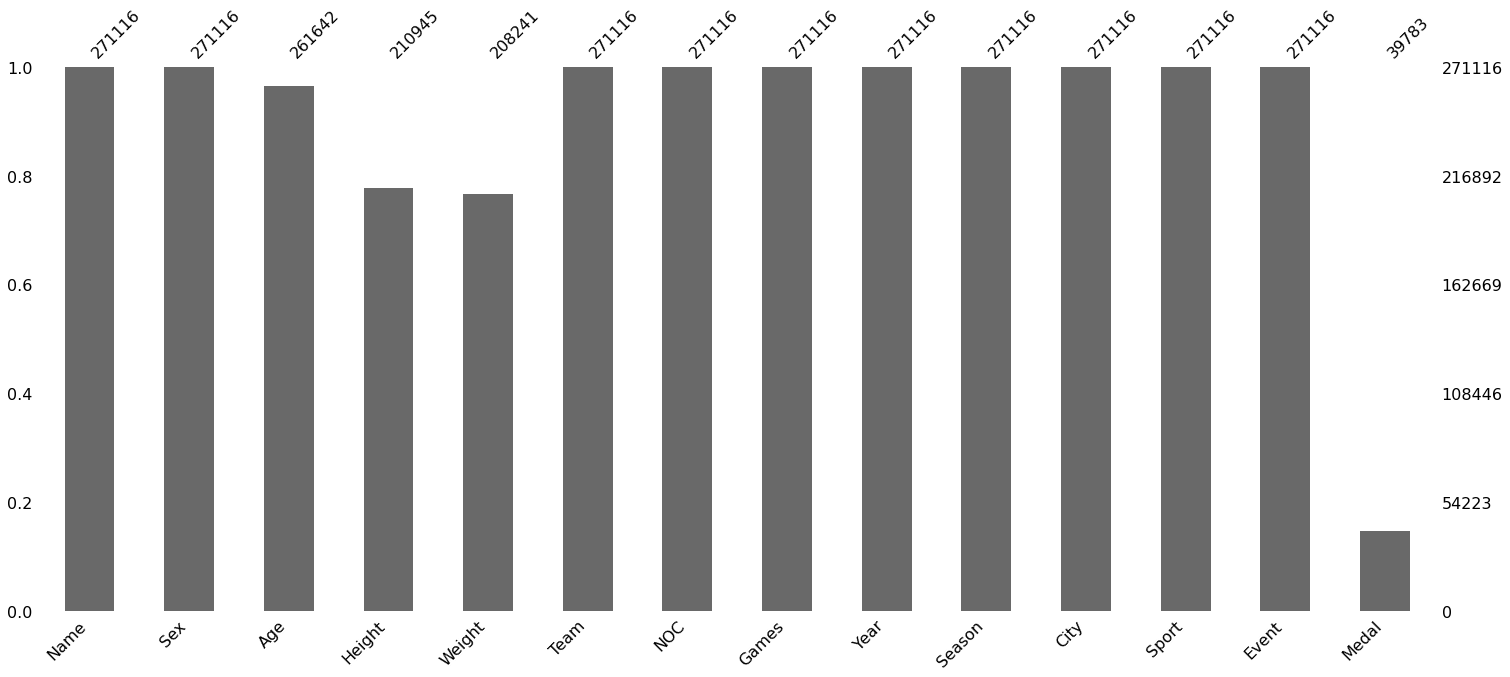

In [ ]:
msno.bar(olympicRecords)


Also as shown in the bar char, the `Medal` column has a lot of missing values <br> so lets explore all columns that have missing values and plot then before and after the data cleaning process 

**`Distribution of  medals  across the dataset`**


In [ ]:
print(olympicRecords.Medal.value_counts())
print(olympicRecords.Medal.unique())


Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64
[nan 'Gold' 'Bronze' 'Silver']


- Although the medal column contains NAN values, they do not appear in the graph, so we will hardcode these values later in this notebook by converting them from "NA" to "non" in the handling missing values section.
- We also notice that the counts for all three medal types are similar (balanced)

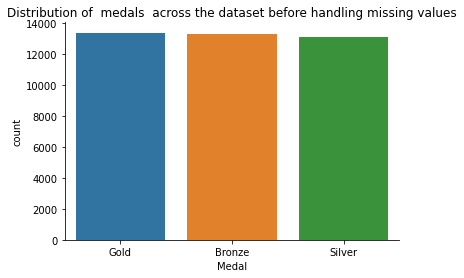

In [ ]:
plt.title("Distribution of  medals  across the dataset before handling missing values")
sns.countplot(x = "Medal", data = olympicRecords )
sns.despine()

For continuous variables, we need to understand the central tendency and spread of the variable. Univariate analysis is also used to highlight missing and outlier values.  

The graphs below show the distribution of age, height, and weight across the dataset, as well as the outlier values in the dataset, as shown in the boxplot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


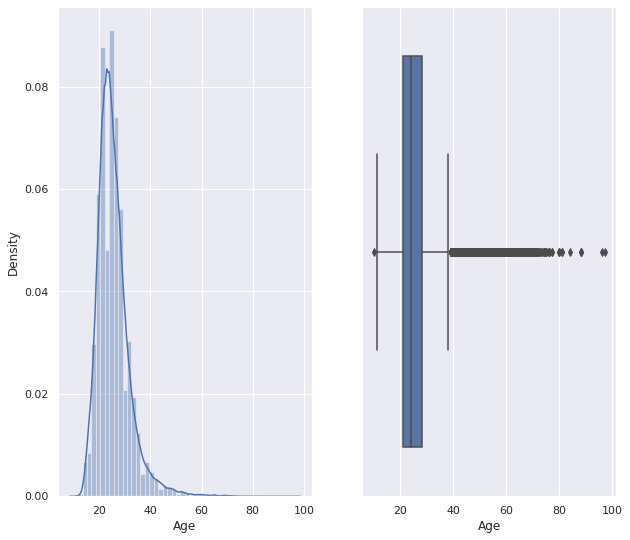

In [ ]:
sns.set(rc={'figure.figsize':(10,9)})
fig, ax =plt.subplots(1,2)
sns.distplot(olympicRecords["Age"],  ax=ax[0]) 
sns.boxplot(olympicRecords["Age"],  ax=ax[1]) 
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1300x650 with 0 Axes>

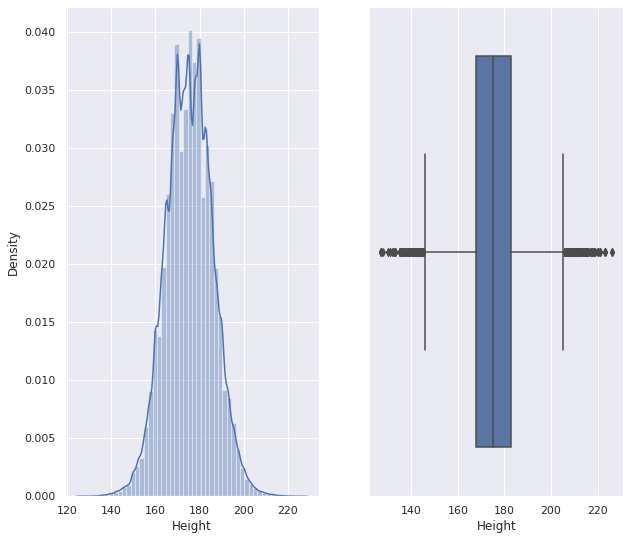

In [ ]:
plt.figure(figsize=(10, 5), dpi=130)
fig, ax =plt.subplots(1,2)
sns.distplot(olympicRecords["Height"],  ax=ax[0]) 
sns.boxplot(olympicRecords["Height"],  ax=ax[1]) 
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function seaborn.rcmod.reset_orig>

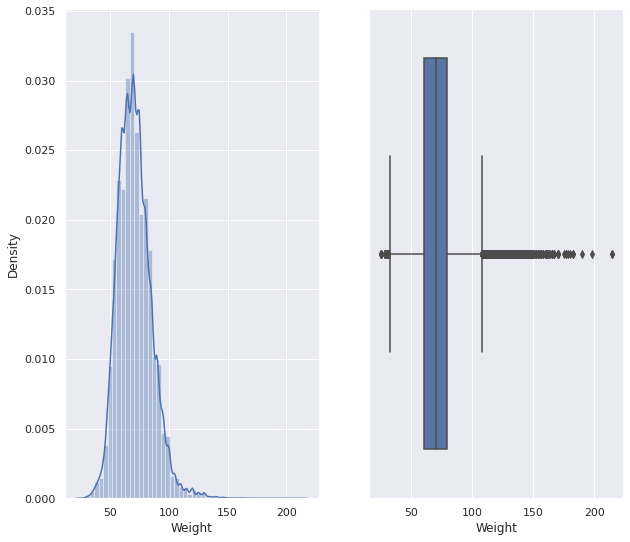

<Figure size 1300x650 with 0 Axes>

In [ ]:
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(10, 5), dpi=130)
sns.distplot(olympicRecords["Weight"],  ax=ax[0]) 
sns.boxplot(olympicRecords["Weight"],  ax=ax[1]) 
fig.show()
#reset size
sns.reset_orig

We know that the height, age, and weight have outliers and missing values, so let's see if there is any relationship between vars before we deal with them.



 Visualize the correlation 

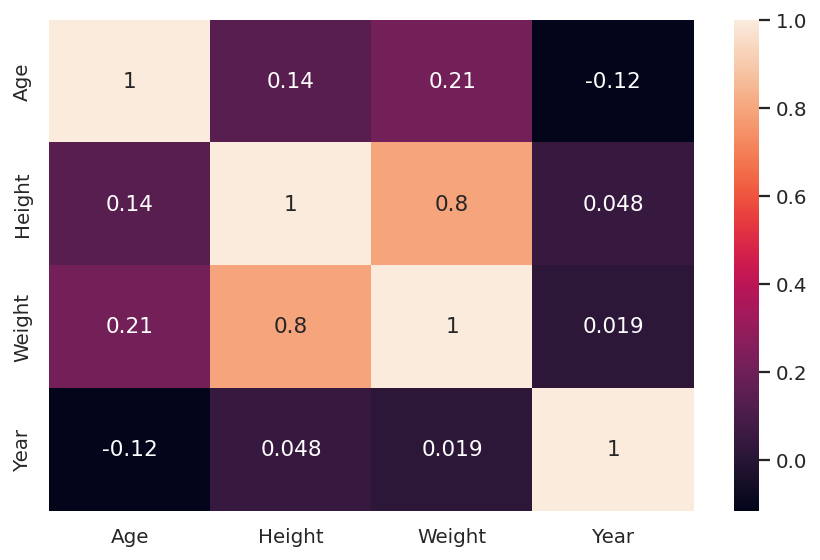

In [ ]:
fig = plt.figure(figsize=(8, 5), dpi=130)
sns.heatmap(olympicRecords.corr(),annot =True)

the previous heatmap chart show a strong relationship between the height and the weight which means we can predict height's missing values depending on the weight value 

#Cleaning the Data

The notes column will be removed, because the notes column is irrelevant to our analysis.

In [ ]:
regions.drop('notes', axis = 1, inplace = True)
regions.rename(columns = {'region':'Country'}, inplace = True)

In [ ]:
regions.head()

,Country
NOC,
AFG,Afghanistan
AHO,Curacao
ALB,Albania
ALG,Algeria
AND,Andorra


### Handling missing values 



**We  start by handling the missing values from the medal, weight, height and age attributes **

By the above values, We can find that Age, Height, Weight and Medals have lot of missing values. The medal column have 231333 missing values. This is fine because not all the participants win a medal. So we will replace this values with `non`

In [ ]:
olympicRecords['Medal'].fillna('non', inplace = True)

In [ ]:
print(olympicRecords.isnull().sum())

Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


**here we checked if every NOC value is mapped to only a single team as it should be**

In [ ]:
print(olympicRecords.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


**we found that this is not the case and will try next to make every Noc value mapped to only one team by merging this data set with the regions dataset with NOC as the primary key**

In [ ]:
olympics_merge = olympicRecords.merge(regions,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [ ]:
print(olympicRecords.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: NOC, dtype: int64


In [ ]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


**after checking we found some countries without NOC so will put it manually**

In [ ]:
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

In [ ]:
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team


In [ ]:
print(olympics_merge.loc[:, ['NOC', 'Country']].drop_duplicates()['NOC'].value_counts().head())

VIN    1
CRT    1
BER    1
FRA    1
IRL    1
Name: NOC, dtype: int64


In [ ]:
olympics_merge.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands


now dropping the old team attribute and replace it with the new one

In [ ]:
olympics_merge.drop('Team', axis = 1, inplace = True)
olympics_merge.rename(columns = {'Country': 'Team'}, inplace = True)

In [ ]:
print(olympics_merge.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())

VIN    1
CRT    1
BER    1
FRA    1
IRL    1
Name: NOC, dtype: int64


In [ ]:
olympics_merge.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands


Now we will add a new column that represents the hosting country as we think it will be very important for answering our upcoming questions in the next milestones 

In [ ]:
olympics_merge[['Year','City']].drop_duplicates().sort_values('Year')

,Year,City
3079,1896,Athina
3,1900,Paris
711,1904,St. Louis
268,1906,Athina
1149,1908,London
35,1912,Stockholm
2,1920,Antwerpen
672,1924,Chamonix
39,1924,Paris
133,1928,Amsterdam


since we only have the hosting cities we will add the hosting countries manually

In [ ]:
country_dict = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil'}

In [ ]:
olympics_merge['Host_Country']=olympics_merge['City'].map(country_dict)
olympics_merge.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,NaN


In [ ]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age              9474
Height          60171
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country    48564
dtype: int64


we missed some cities so wi add them one by one 

In [ ]:
olympics_merge.loc[olympics_merge['Host_Country'].isnull(),['City']].drop_duplicates()

,City
4,Calgary
6,Albertville
8,Lillehammer
28,Salt Lake City
30,Lake Placid
40,Sochi
68,Nagano
77,Torino
83,Squaw Valley
85,Innsbruck


In [ ]:
country_dict = {'Athina':'Greece',
                'Paris':'France',
                'St. Louis':'USA',
                'London':'UK',
                'Stockholm':"Sweden",
                'Antwerpen':'Belgium',
                'Amsterdam':'Netherlands',
                'Los Angeles':'USA',
               'Berlin':'Germany',
                'Helsinki':'Finland',
                'Melbourne':'Australia',
                'Roma':'Italy',
                'Tokyo':'Japan',
                'Mexico City':'Mexico',
                'Munich':'Germany',
                'Montreal':'Canada',
                'Moskva':'Russia',
                'Seoul':'South Korea',
               'Barcelona':'Spain',
               'Atlanta':'USA',
               'Sydney':'Australia',
               'Beijing':'China',
               'Rio de Janeiro':'Brazil',
               'Calgary':'Canada',
               'Albertville':'France',
               'Oslo':'Norway',
               'Lillehammer':'Norway',
               'Salt Lake City':'USA',
               'Lake Placid':'USA',
               'Sochi':'Russia',
               'Nagano':'Japan',
               'Torino':'Italy',
               'Squaw Valley':'USA',
               'Innsbruck':'Austria',
               'Sarajevo':'Bosnia and Herzegovina',
               "Cortina d'Ampezzo":'Italy',
               'Vancouver':'Canada',
               'Grenoble':'France',
               'Sapporo':'Japan',
               'Chamonix':'France',
               'Sankt Moritz':'Switzerland',
               'Garmisch-Partenkirchen':'Germany'}

In [ ]:
olympics_merge['Host_Country']=olympics_merge['City'].map(country_dict)
olympics_merge.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada


In [ ]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age              9474
Height          60171
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country        0
dtype: int64


Imputing the missing values of Age, Height and Weight with the respective means for males and females as it is not realistic for males and females to have the same mean for height and weight for example 

In [ ]:
olympics_merge.groupby(["Sex"])["Height"].mean()

Sex
F    167.839740
M    178.858463
Name: Height, dtype: float64

In [ ]:
olympics_merge['Height'] = olympics_merge['Height'].fillna(olympics_merge['Sex'].map({'M':178.858463, 'F': 167.839740}))

In [ ]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age              9474
Height              0
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country        0
dtype: int64


In [ ]:
olympics_merge.groupby(["Sex"])["Age"].mean()

Sex
F    23.732881
M    26.277562
Name: Age, dtype: float64

In [ ]:
olympics_merge['Age'] = olympics_merge['Age'].fillna(olympics_merge['Sex'].map({'M': 26.277562, 'F': 23.732881}))

In [ ]:
print(olympics_merge.isnull().sum())

Name                0
Sex                 0
Age                 0
Height              0
Weight          62875
NOC                 0
Games               0
Year                0
Season              0
City                0
Sport               0
Event               0
Medal               0
Team                0
Host_Country        0
dtype: int64


In [ ]:
olympics_merge.groupby(["Sex"])["Weight"].mean()

Sex
F    60.021252
M    75.743677
Name: Weight, dtype: float64

In [ ]:
olympics_merge['Weight'] = olympics_merge['Weight'].fillna(olympics_merge['Sex'].map({'M': 75.743677, 'F': 60.021252}))

In [ ]:
print(olympics_merge.isnull().sum())

Name            0
Sex             0
Age             0
Height          0
Weight          0
NOC             0
Games           0
Year            0
Season          0
City            0
Sport           0
Event           0
Medal           0
Team            0
Host_Country    0
dtype: int64


In [ ]:
olympics_merge.head(20)

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Canada
6,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,France
7,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,France
8,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Norway
9,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Norway


### Handling outliers



####Height & Weight

Now that our data is clean and have no missing values we next have to handle the outliers

So when we think that we cant just drop the outliers from the height and the weight directly
we think we should treat this case as a multivariate outlier and consider only the unrealistic weight values with respect to their height

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


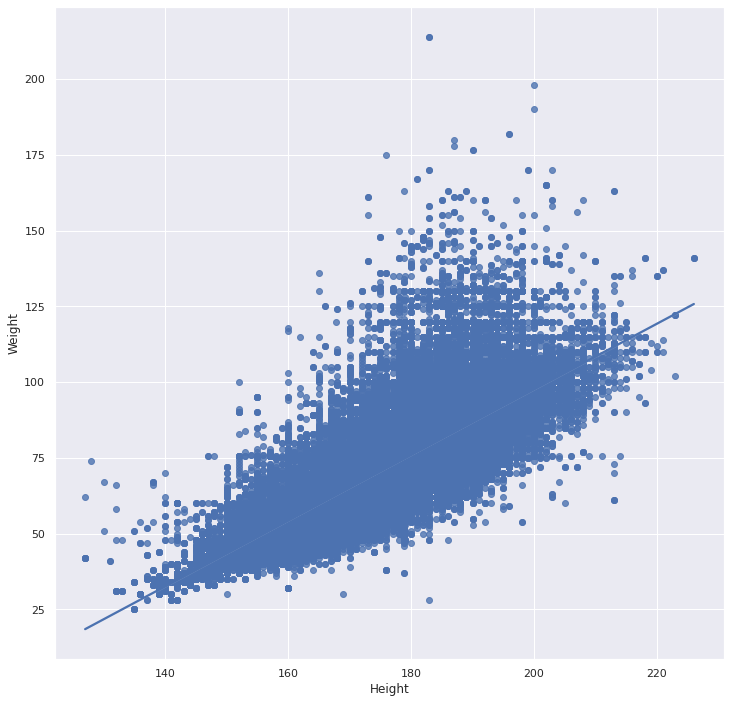

In [ ]:
plt.figure(figsize=(12,12))
sns.regplot(olympics_merge['Height'],olympics_merge['Weight'])

In [ ]:
clf = LocalOutlierFactor()

In [ ]:
X = olympics_merge[['Height','Weight']].values
y_pred = clf.fit_predict(X)

Now we plot the height and weight after predicting the outliers usin Local outlier factor and the red dots presents the outliers detected 

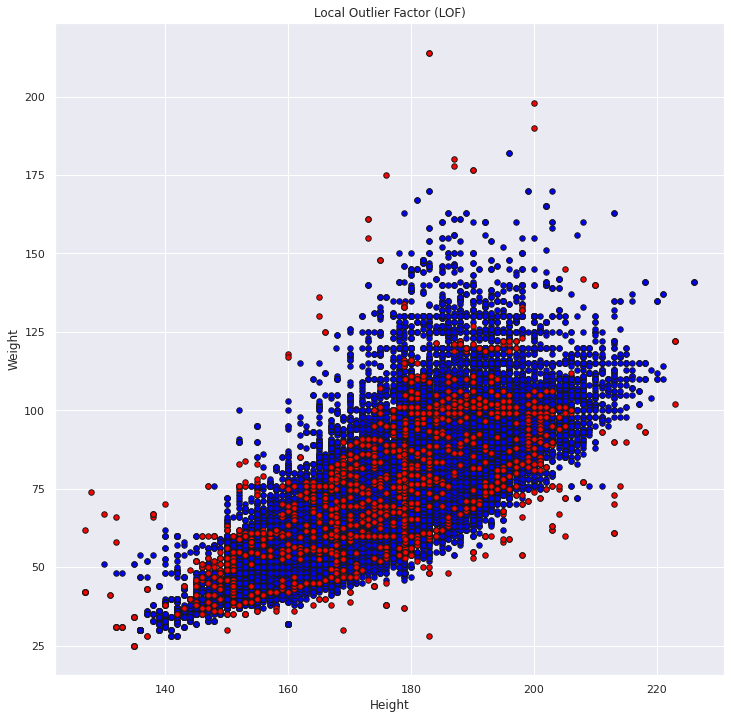

In [ ]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Height');
plt.ylabel('Weight');
plt.show()

As we see the LOF was able to detect real outliers even within the normal range which would not possible to detect if we  treated the height and weight seperatly 

In [ ]:
len(y_pred)

271116

In [ ]:
len(X[in_mask])

265534

In [ ]:
len(X[out_mask])

5582

In [ ]:
olympics_merge['outlier']= y_pred

In [ ]:
olympics_merge.head(10)

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country,outlier
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain,1
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK,1
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium,1
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France,1
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada,1
5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Canada,1
6,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,France,1
7,Christine Jacoba Aaftink,F,25.0,185.000000,82.000000,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,France,1
8,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Norway,1
9,Christine Jacoba Aaftink,F,27.0,185.000000,82.000000,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",non,Netherlands,Norway,1


Dropping outliers for values greater than `0`

In [ ]:
olympics_merge_outliersDropped = olympics_merge.loc[(olympics_merge["outlier"] > 0)]

In [ ]:
olympics_merge_outliersDropped.drop(columns= "outlier",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,




```
# This is formatted as code
```

now we plot the height and weight after removing the outliers


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


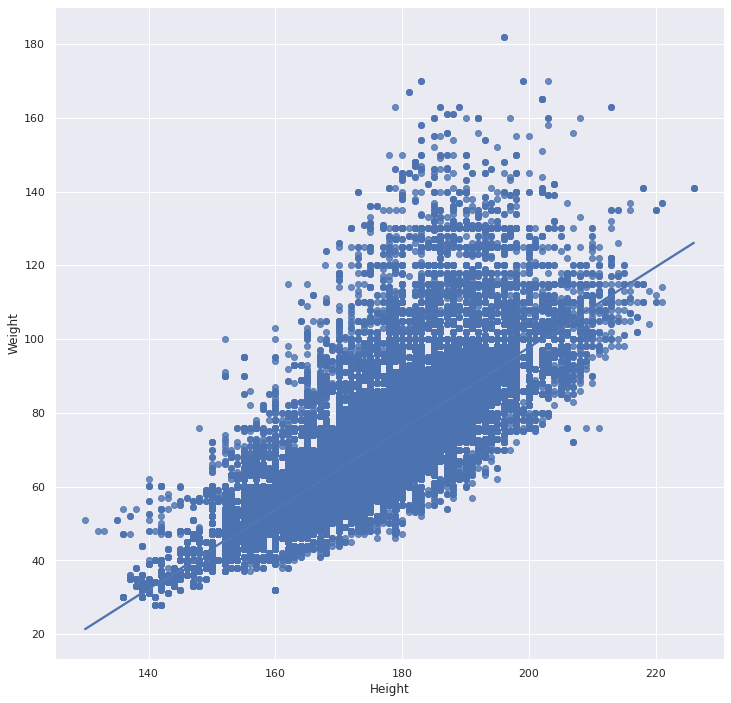

In [ ]:
plt.figure(figsize=(12,12))
sns.regplot(olympics_merge_outliersDropped['Height'],olympics_merge_outliersDropped['Weight'])

we see that now we have less outliers than before the LOF 

In [ ]:
olympics_merge_outliersDropped.shape

(265534, 15)

####Age

The age values range from `[10 to 97]` as shown in the boxplot figure of the outlier in the visualtization before cleaning section. So, because all of these values are real, we can't get rid of any of them, so we've decided to keep all age outliers.

# Visualisations

Age distribution between males and females 



In [ ]:
gender_counts = olympics_merge_outliersDropped.Sex.value_counts()
gender_counts

M    192881
F     72653
Name: Sex, dtype: int64

The graph shows that men make up the vast majority of the people in the dataset. This is useful information that will help with the research questions.

([<matplotlib.patches.Wedge at 0x7f8549334990>,
 [Text(0.2051771906049158, -1.0806952949168764, 'M'),
  Text(-0.2051772917869115, 1.0806952757067965, 'F')],
 [Text(0.11191483123904497, -0.5894701608637507, '72.6%'),
  Text(-0.11191488642922444, 0.5894701503855252, '27.4%')])

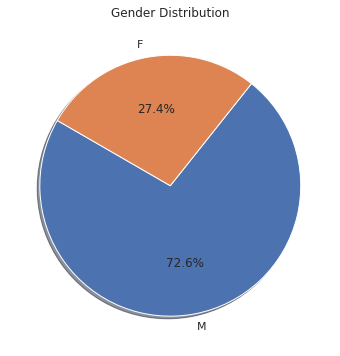

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=150, shadow=True)

The medal distribution graph shows that the majority of participants did not win any medals, which is a true fact.

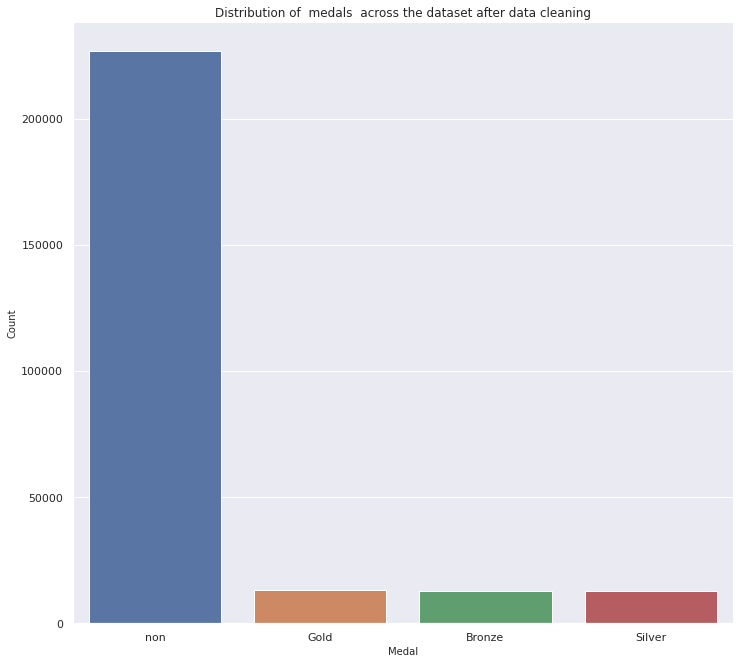

In [ ]:
fig, axes = plt.subplots(1)
plt.tight_layout(pad = 1)
plt.title("Distribution of  medals  across the dataset after data cleaning")
sns.countplot(x = "Medal", data = olympics_merge_outliersDropped)
axes.set_xlabel("Medal", fontsize = 10)
axes.set_ylabel("Count", fontsize = 10)
sns.despine()


In [ ]:
#olympics_merge_outliersDropped.Medal.unique()

In [ ]:
#olympics_merge_outliersDropped = olympics_merge_outliersDropped.replace({'Medal':{'Gold': 1,'Silver': 1,'Bronze':1, 'non': 0}})

In [ ]:
#olympics_merge_outliersDropped.Medal.unique()

In [ ]:
#summer_olympics = olympics_merge_outliersDropped[olympics_merge_outliersDropped.Season == 'Summer']
#winter_olympics = olympics_merge_outliersDropped[olympics_merge_outliersDropped.Season == 'Winter']

In [ ]:
#summer_medal_count = summer_olympics[['Host_Country','Medal']].groupby('Host_Country', as_index = False).sum()
#summer_medal_count = summer_medal_count[summer_medal_count.Medal>0].sort_values(by = ['Medal'], ascending = False).head(10)
#winter_medal_count = winter_olympics[['Host_Country','Medal']].groupby('Host_Country', as_index = False).sum()
#winter_medal_count = winter_medal_count[winter_medal_count.Medal>0].sort_values(by = 'Medal', ascending = False).head(10)

#print('-'*5,'SUMMER OLYMPICS', '-'*5)
#print(summer_medal_count)
#print()
#print('-'*5,'WINTER OLYMPICS', '-'*5)
#print(winter_medal_count)


In [ ]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,.5])
#ax.barh(summer_medal_count.Host_Country,summer_medal_count.Medal)
#ax.invert_yaxis()
#plt.title('Summer Olympics', fontsize = 16)
#fig.show()

In [ ]:

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,.5])
#ax.barh(winter_medal_count.Host_Country,winter_medal_count.Medal)
#ax.invert_yaxis()
#plt.title('Winter Olympics', fontsize = 16)
#fig.show()

Age distribution over time between men and woman  (useful for further anylsis)

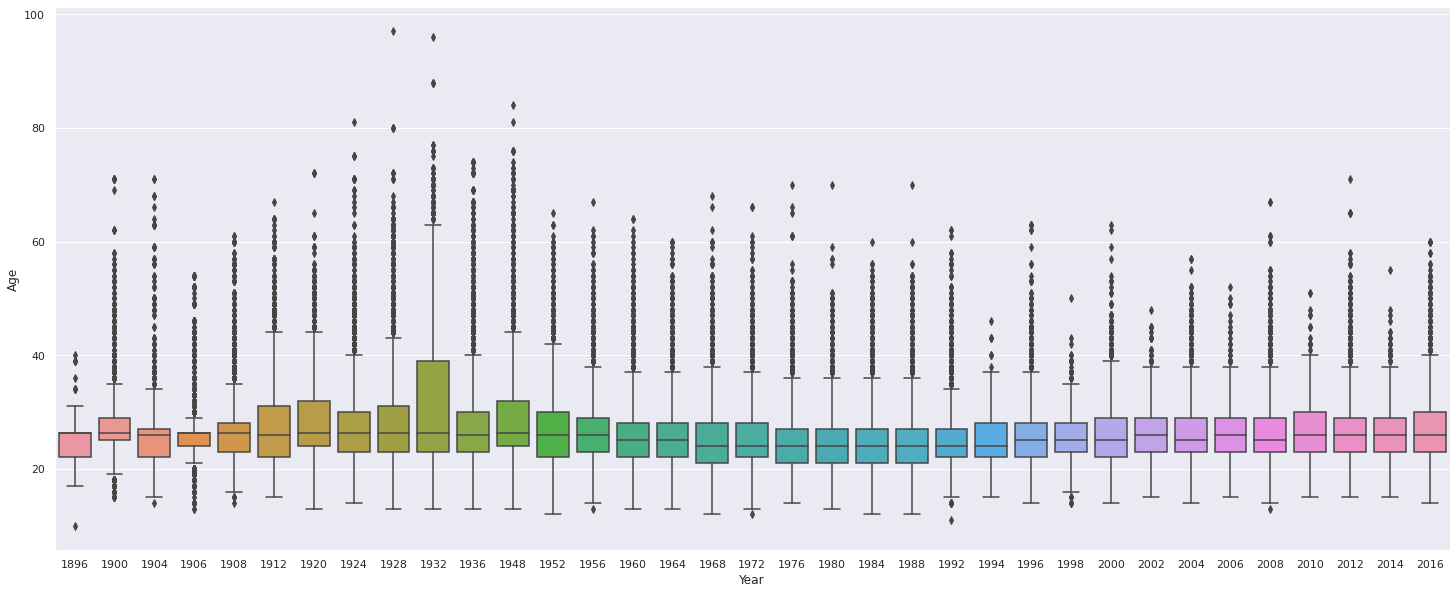

In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
sns.boxplot(x="Year", y="Age", data=olympics_merge_outliersDropped[olympics_merge_outliersDropped['Sex']=='M'])



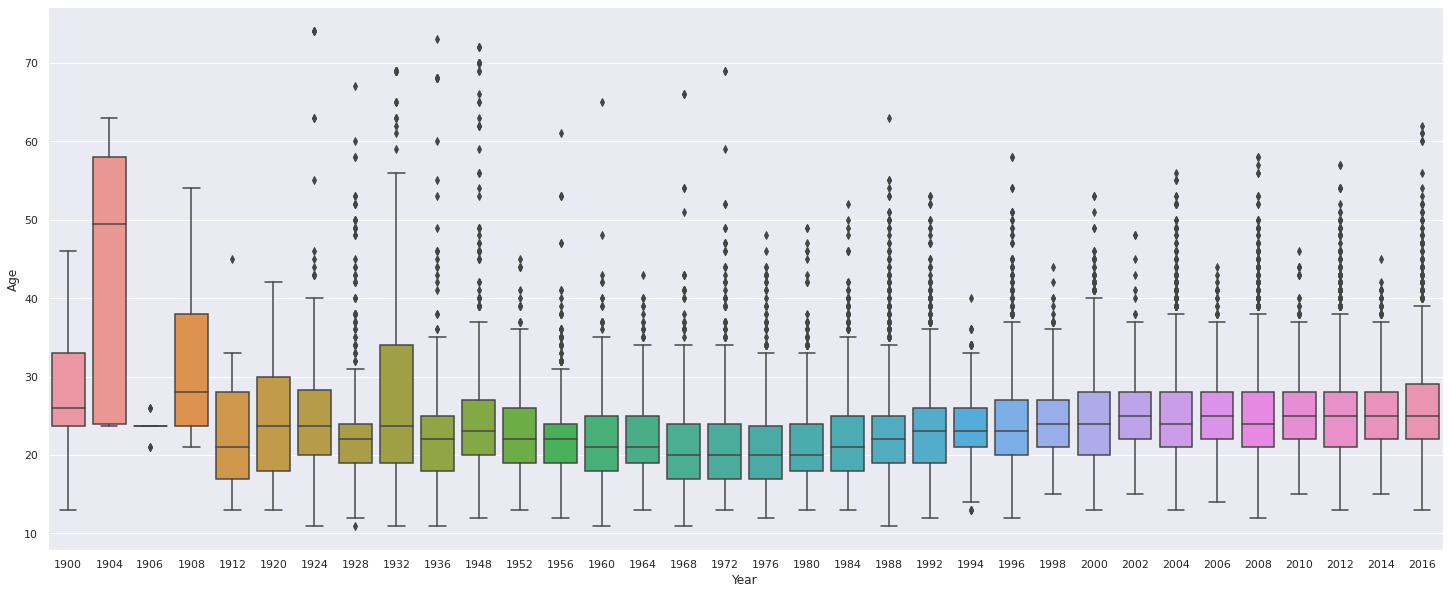

In [ ]:
sns.boxplot(x="Year", y="Age", data=olympics_merge_outliersDropped[olympics_merge_outliersDropped['Sex']=='F'])


# Data merging and feature engineering


Previously in milestone 1 we did already merge the dataset NOC regions and then we did the first feature Engineering by creating the column 'Host_Country'.
So now we will merge the additional data specificly 2 more datasets one that is the GDP for each country across the years and the other dataset have information about the population of the countries, the 2 new datasets are very useful for us to answer our research question 

In [ ]:
w_gdp = pd.read_csv('https://raw.githubusercontent.com/abzokhattab/120-years-of-Olympic-History-Analysis/main/world_gdp.csv', skiprows = 3)

In [ ]:
w_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

In [ ]:
w_gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.461666e+09,4.128821e+09,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924242e+09,1.965385e+09,2.173750e+09,2.156625e+09,2.126000e+09,2.335125e+09,2.101625e+09,1.139167e+09,7.094526e+08,1.228071e+09,1.985674e+09,2.424499e+09,3.314898e+09,2.359903e+09,2.707124e+09,3.414761e+09,3.632044e+09,4.060759e+09,4.435079e+09,5.746946e+09,7.314865e+09,8.158549e+09,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
2,Algeria,DZA,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,3.852116e+09,4.257219e+09,4.863487e+09,5.077222e+09,6.761786e+09,8.715106e+09,1.320971e+10,1.555793e+10,1.772835e+10,2.097190e+10,2.636449e+10,3.324342e+10,4.234528e+10,4.434867e+10,4.520709e+10,4.880137e+10,5.369828e+10,5.793787e+10,6.369630e+10,6.674227e+10,5.908907e+10,5.563149e+10,6.204510e+10,4.571537e+10,4.800330e+10,4.994646e+10,4.254257e+10,4.176405e+10,4.694150e+10,4.817786e+10,4.818775e+10,4.864057e+10,5.479025e+10,5.474471e+10,5.676029e+10,6.786383e+10,8.532500e+10,1.031980e+11,1.170270e+11,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.140000e+08,5.270000e+08,5.120000e+08,5.030000e+08,4.960000e+08,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.434430e+09,1.496913e+09,1.733117e+09,2.398646e+09,2.935659e+09,3.255789e+09,3.543257e+09,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In [ ]:
w_gdp = pd.melt(w_gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

In [ ]:
w_gdp['Year'] = pd.to_numeric(w_gdp['Year'])

In [ ]:
w_gdp.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In [ ]:
len(list(set(olympics_merge_outliersDropped['NOC'].unique()) - set(w_gdp['Country Code'].unique())))

108

In [ ]:
len(list(set(olympics_merge_outliersDropped['Team'].unique()) - set(w_gdp['Country Name'].unique())))

6

In [ ]:
# Merge to get country code
olympics_merge_ccode = olympics_merge_outliersDropped.merge(w_gdp[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

olympics_merge_ccode.drop('Country Name', axis = 1, inplace = True)

# Merge to get gdp too
olympics_merge_gdp = olympics_merge_ccode.merge(w_gdp,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)

In [ ]:
w_pop = pd.read_csv('https://raw.githubusercontent.com/abzokhattab/120-years-of-Olympic-History-Analysis/main/world_pop.csv')

In [ ]:
w_pop.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

w_pop = pd.melt(w_pop, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

# Change the Year to integer type
w_pop['Year'] = pd.to_numeric(w_pop['Year'])

w_pop.head()

,Country,Country Code,Year,Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [ ]:
olympics_final = olympics_merge_gdp.merge(w_pop,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_final.drop('Country', axis = 1, inplace = True)

olympics_final.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country,Country Code,GDP,Population
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain,CHN,4.269160e+11,1.164970e+09
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK,CHN,8.560550e+12,1.350695e+09
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium,DNK,NaN,NaN
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France,DNK,NaN,NaN
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada,NLD,2.585680e+11,1.476009e+07


Now for further analysis we decided to create a new feature represents if in this row there is a medal won or not because this will help us figure the medals won for each team 

In [ ]:
olympics_final['Medal_Won'] = np.where(olympics_final.loc[:,'Medal'] == 'non', 0, 1)

In [ ]:
olympics_final.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country,Country Code,GDP,Population,Medal_Won
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain,CHN,4.269160e+11,1.164970e+09,0
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK,CHN,8.560550e+12,1.350695e+09,0
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium,DNK,NaN,NaN,0
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France,DNK,NaN,NaN,1
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada,NLD,2.585680e+11,1.476009e+07,0


But this this new column is only saying if the athelete won a medal or not so if the event is a team event it will consider many incorrect medals for the medals won for the country as it is supposed to be considered a 1 medal for the country because it  is a team event for example like football each player hold 1 medal meaning a more than 11 medals for the whole team which is wrong the whole country only won a gold medal in football event so lets fix this 

In [ ]:
# Check whether number of medals won in a year for an event by a team exceeds 1. This indicates a team event.
identify_team_events = pd.pivot_table(olympics_final,
                                      index = ['Team', 'Year', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('non', axis = 1).reset_index()

identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]

team_sports = identify_team_events['Event'].unique()

In [ ]:
team_sports

array(["Polo Men's Polo", "Rowing Men's Double Sculls",
       "Basketball Men's Basketball", "Football Men's Football",
       "Cycling Men's Madison", "Hockey Men's Hockey",
       'Sailing Mixed Multihull', "Rugby Men's Rugby",
       "Swimming Men's 4 x 200 metres Freestyle Relay",
       "Cycling Men's Tandem Sprint, 2,000 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Women's 4 x 100 metres Freestyle Relay",
       "Equestrianism Men's Three-Day Event, Team",
       'Sailing Mixed 5.5 metres', 'Sailing Mixed Three Person Keelboat',
       'Sailing Mixed Two Person Keelboat',
       "Swimming Men's 4 x 100 metres Medley Relay",
       "Cycling Men's Team Pursuit, 4,000 metres",
       "Hockey Women's Hockey",
       'Equestrianism Mixed Three-Day Event, Team',
       "Rowing Men's Coxless Fours", "Rowing Women's Coxless Pairs",
       "Tennis Men's Doubles",
       "Beach Volleyball Women's Beach Volleyball",
       "Sailing Men's Two Person Dinghy",
  

After some research we found some events that are not really team events but our algorithm will identify them as so, so we will remove them manually

In [ ]:
remove_sports = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]

team_sports = list(set(team_sports) - set(remove_sports))

Lets create a mask that identify wether the event is a team or single event 

In [ ]:
# if an event name matches with one in team sports, then it is a team event. Others are singles events.
team_event_mask = olympics_final['Event'].map(lambda x: x in team_sports)
single_event_mask = [not i for i in team_event_mask]

# rows where medal_won is 1
medal_mask = olympics_final['Medal_Won'] == 1

# Put 1 under team event if medal is won and event in team event list
olympics_final['Team_Event'] = np.where(team_event_mask & medal_mask, 1, 0)

# Put 1 under singles event if medal is won and event not in team event list
olympics_final['Single_Event'] = np.where(single_event_mask & medal_mask, 1, 0)

# Add an identifier for team/single event
olympics_final['Event_Category'] = olympics_final['Single_Event'] + \
olympics_final['Team_Event']

In [ ]:
olympics_final.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country,Country Code,GDP,Population,Medal_Won,Team_Event,Single_Event,Event_Category
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain,CHN,4.269160e+11,1.164970e+09,0,0,0,0
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK,CHN,8.560550e+12,1.350695e+09,0,0,0,0
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium,DNK,NaN,NaN,0,0,0,0
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France,DNK,NaN,NaN,1,1,0,1
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada,NLD,2.585680e+11,1.476009e+07,0,0,0,0


As another feature we will add a new column that we will use later in answering the upcoming questions the new feature (column) is GDP per capita which is simply the ratio between how rich the country is to it's population 

In [ ]:
olympics_final["GDP/Capita"] = olympics_final["GDP"]/olympics_final["Population"]

In [ ]:
olympics_final.head()

,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Team,Host_Country,Country Code,GDP,Population,Medal_Won,Team_Event,Single_Event,Event_Category,GDP/Capita
0,A Dijiang,M,24.0,180.000000,80.000000,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,non,China,Spain,CHN,4.269160e+11,1.164970e+09,0,0,0,0,366.460939
1,A Lamusi,M,23.0,170.000000,60.000000,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,non,China,UK,CHN,8.560550e+12,1.350695e+09,0,0,0,0,6337.885311
2,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,non,Denmark,Belgium,DNK,NaN,NaN,0,0,0,0,NaN
3,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,France,DNK,NaN,NaN,1,1,0,1,NaN
4,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,non,Netherlands,Canada,NLD,2.585680e+11,1.476009e+07,0,0,0,0,17518.045617


In [ ]:
#olympics_final['BMI'] = olympics_final['Weight']/((olympics_final['Height']/100)**2)
#olympics_final.head()

#Answering our research questions

Before answering the first question we need to calculate the total medals (some call it medal tally) agnostic of the team size - one gold means one gold for an event. To do this we divide the number of medals by the count of winning team members. How do we get the team members? Sum of event_category column should do that for us!

In [ ]:
medal_tally_agnostic = olympics_final.\
groupby(['Year', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].\
agg('sum').reset_index()

medal_tally_agnostic['Medal_Won_Corrected'] = medal_tally_agnostic['Medal_Won']/medal_tally_agnostic['Event_Category']

In [ ]:
medal_tally_agnostic.head()

,Year,Team,Event,Medal,Medal_Won,Event_Category,Medal_Won_Corrected
0,1896,Australia,"Athletics Men's 1,500 metres",Gold,1,1,1.0
1,1896,Australia,Athletics Men's 800 metres,Gold,1,1,1.0
2,1896,Australia,Athletics Men's Marathon,non,0,0,NaN
3,1896,Australia,Tennis Men's Doubles,Bronze,1,1,1.0
4,1896,Australia,Tennis Men's Singles,non,0,0,NaN


##Who are the greatest olympics playing nations of all time ? 

with this corrected data now it is time to answer the first questio.
Who are the greatest olympics playing nations of all time?

In [ ]:
medal_tally = medal_tally_agnostic.groupby(['Year','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

medal_tally_pivot = pd.pivot_table(medal_tally,
                     index = 'Team',
                     columns = 'Year',
                     values = 'Medal_Won_Corrected',
                     aggfunc = 'sum',
                     margins = True).sort_values('All', ascending = False)[1:5]


medal_tally_pivot.loc[:,'All']

Team
USA        2778.0
Russia     1870.0
Germany    1737.0
UK          907.0
Name: All, dtype: float64

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


USA, Russia, Germany, UK are the best countries in olympics at all times ! 
Let's see how they performed across the years 

Text(0.5, 1.0, 'Olympic Performance Comparison')

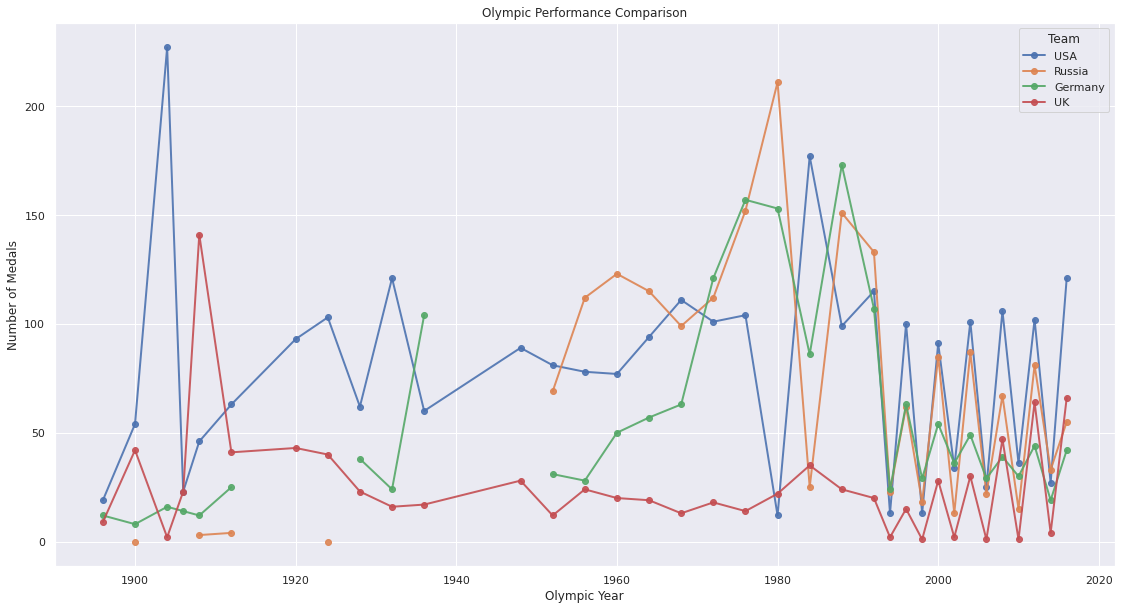

In [ ]:
top_countries = ['USA', 'Russia', 'Germany', 'UK']

year_team_medals = pd.pivot_table(medal_tally,
                                  index = 'Year',
                                  columns = 'Team',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum')[top_countries]


year_team_medals.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (19,10), linewidth = 2)
xlabel('Olympic Year')
ylabel('Number of Medals')
title('Olympic Performance Comparison')

After searching the blank values here belongs to events where these countries did not participate for different reasons the important thing is that these are not errors 

Lets plot a breakup of medal tally by the medal type - Gold, Silver, Bronze

Text(0, 0.5, 'Country')

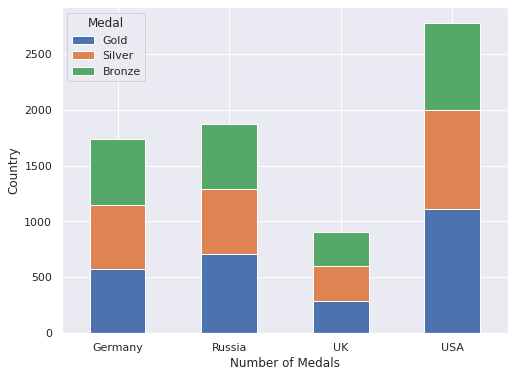

In [ ]:
top_countries = ['USA', 'Russia', 'Germany', 'UK']

# row mask where countries match
row_mask_2 = medal_tally_agnostic['Team'].map(lambda x: x in top_countries)

# Pivot table to calculate sum of gold, silver and bronze medals for each country
medal_tally_specific = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                     index = ['Team'],
                                     columns = 'Medal',
                                     values = 'Medal_Won_Corrected',
                                     aggfunc = 'sum',
                                     fill_value = 0).drop('non', axis = 1)

# Re-order the columns so that they appear in order on the chart.
medal_tally_specific = medal_tally_specific.loc[:, ['Gold', 'Silver', 'Bronze']]

medal_tally_specific.plot(kind = 'bar', stacked = True, figsize = (8,6), rot = 0)
xlabel('Number of Medals')
ylabel('Country')

##What sports are the top countries best at?


We will consider the term best as the sports which these countries won the most gold medals 

In [ ]:
# To get the sports, teams are best at, we now aggregate the medal_tally_agnostic dataframe as we did earlier.
best_team_sports = pd.pivot_table(medal_tally_agnostic[row_mask_2],
                                  index = ['Team', 'Event'],
                                  columns = 'Medal',
                                  values = 'Medal_Won_Corrected',
                                  aggfunc = 'sum',
                                  fill_value = 0).sort_values(['Team', 'Gold'], ascending = [True, False]).reset_index()

best_team_sports.drop(['Bronze', 'Silver', 'non'], axis = 1, inplace = True)
best_team_sports.columns = ['Team', 'Event', 'Gold_Medal_Count']

best_team_sports.groupby('Team').head(5)

,Team,Event,Gold_Medal_Count
0,Germany,"Equestrianism Mixed Dressage, Team",11
1,Germany,Luge Men's Singles,10
2,Germany,Luge Mixed (Men)'s Doubles,10
3,Germany,Luge Women's Singles,10
4,Germany,Bobsleigh Men's Four,8
567,Russia,Figure Skating Mixed Pairs,13
568,Russia,Gymnastics Women's Team All-Around,10
569,Russia,"Wrestling Men's Heavyweight, Freestyle",9
570,Russia,Gymnastics Men's Horse Vault,8
571,Russia,Gymnastics Men's Individual All-Around,8


##By sending more players to olympics do countries have a higher chance to collect more medals ?, in other words, Does the size of the contingent relate with the number of medals ?

to answer this quetion first we need to know the size of Olympic contingent that these countries send to the Olympics

In [ ]:
row_mask_3 = olympics_final['Team'].map(lambda x: x in top_countries)

year_team_gender = olympics_final.loc[row_mask_3, ['Year','Team', 'Name', 'Sex']].drop_duplicates()

In [ ]:
year_team_gender.head()

,Year,Team,Name,Sex
10,1992,USA,Per Knut Aaland,M
14,1994,USA,Per Knut Aaland,M
18,1992,USA,John Aalberg,M
22,1994,USA,John Aalberg,M
157,2008,Russia,Mariya Vasilyevna Abakumova (-Tarabina),F


In [ ]:

year_team_gender_count = pd.pivot_table(year_team_gender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()


year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)


year_team_gender_count.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']


year_team_gender_count['Total_Athletes'] = year_team_gender_count['Female_Athletes'] + \
year_team_gender_count['Male_Athletes']

In [ ]:
# Separate country wise data

uk_data = year_team_gender_count[year_team_gender_count['Team'] == "UK"]
uk_data.fillna(0, inplace = True)
uk_data.set_index('Year', inplace = True)

ger_data = year_team_gender_count[year_team_gender_count['Team'] == "Germany"]
ger_data.set_index('Year', inplace = True)

rus_data = year_team_gender_count[year_team_gender_count['Team'] == "Russia"]
rus_data.set_index('Year', inplace = True)

usa_data = year_team_gender_count[year_team_gender_count['Team'] == "USA"]
usa_data.set_index('Year', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


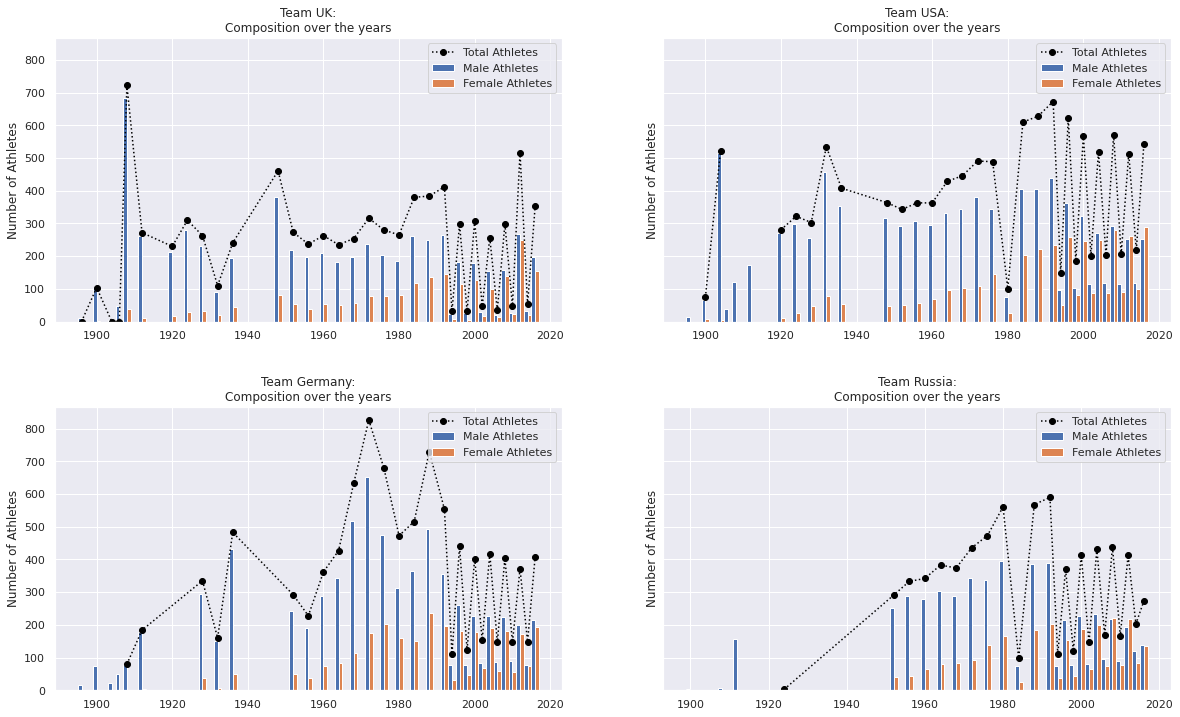

In [ ]:
# Plot the values of male, female and total athletes using bar charts and the line charts.
fig, ((ax1, ax2), (ax3, ax4)) = subplots(nrows = 2, ncols = 2, figsize = (20, 12), sharey = True)
fig.subplots_adjust(hspace = 0.3)

# Plot team UK's contingent size
ax1.bar(uk_data.index.values, uk_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax1.bar(uk_data.index.values, uk_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax1.plot(uk_data.index.values, uk_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax1.set_title('Team UK:\nComposition over the years')
ax1.set_ylabel('Number of Athletes')
ax1.legend(loc = 'best')

# Plot team USA's contingent size
ax2.bar(usa_data.index.values, usa_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax2.bar(usa_data.index.values, usa_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax2.plot(usa_data.index.values, usa_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax2.set_title('Team USA:\nComposition over the years')
ax2.set_ylabel('Number of Athletes')
ax2.legend(loc = 'best')

# Plot team Germany's contingent size
ax3.bar(ger_data.index.values, ger_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax3.bar(ger_data.index.values, ger_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax3.plot(ger_data.index.values, ger_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes', 
         marker = 'o')
ax3.set_title('Team Germany:\nComposition over the years')
ax3.set_ylabel('Number of Athletes')
ax3.legend(loc = 'best')

# Plot team Russia's contingent size
ax4.bar(rus_data.index.values, rus_data['Male_Athletes'], width = -1, align = 'edge', label = 'Male Athletes')
ax4.bar(rus_data.index.values, rus_data['Female_Athletes'], width = 1, align = 'edge', label = 'Female Athletes')
ax4.plot(rus_data.index.values, rus_data['Total_Athletes'], linestyle = ':', color = 'black', label = 'Total Athletes',
        marker = 'o')
ax4.set_title('Team Russia:\nComposition over the years')
ax4.set_ylabel('Number of Athletes')
ax4.legend(loc = 'best')

show()

Now it is time to answer the question does the size of the contingent affects the number of medals ?

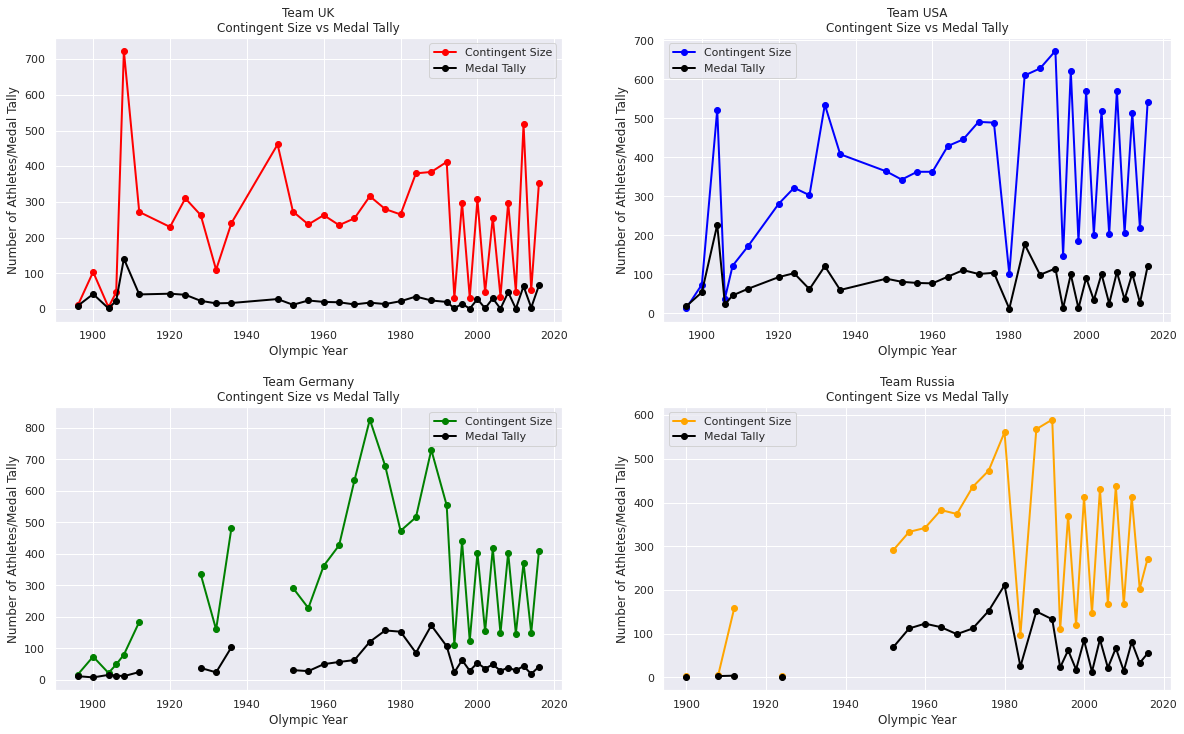

In [ ]:
# Get year wise team wise athletes.
year_team_athelete = olympics_final.loc[row_mask_3, ['Year','Team', 'Name']].drop_duplicates()

# sum these up to get total contingent size.
contingent_size = pd.pivot_table(year_team_athelete,
                                 index = 'Year',
                                 columns = 'Team',
                                 values = 'Name',
                                 aggfunc = 'count')

fig, ((ax1, ax2), (ax3, ax4)) = subplots(nrows = 2,
                                         ncols = 2,
                                        figsize = (20,12))

fig.subplots_adjust(hspace = 0.3)

# Plot australia's medal tally and contingent size
contingent_size['UK'].plot(ax = ax1, linestyle = '-', marker = 'o', linewidth = 2, color = 'red', 
                                  label = 'Contingent Size')
year_team_medals['UK'].plot(ax = ax1, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                                  label = 'Medal Tally')

ax1.set_xlabel('Olympic Year')
ax1.set_ylabel('Number of Athletes/Medal Tally')
ax1.set_title('Team UK\nContingent Size vs Medal Tally')
ax1.legend(loc = 'best')

# Plot USA's medal tally and contingent size
contingent_size['USA'].plot(ax = ax2, linestyle = '-', marker = 'o', linewidth = 2, color = 'blue',
                           label = 'Contingent Size')
year_team_medals['USA'].plot(ax = ax2, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                            label = 'Medal Tally')

ax2.set_xlabel('Olympic Year')
ax2.set_ylabel('Number of Athletes/Medal Tally')
ax2.set_title('Team USA\nContingent Size vs Medal Tally')
ax2.legend(loc = 'best')

# Plot Germany's medal tally and contingent size
contingent_size['Germany'].plot(ax = ax3, linestyle = '-', marker = 'o', linewidth = 2, color = 'green',
                               label = 'Contingent Size')
year_team_medals['Germany'].plot(ax = ax3, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                                label = 'Medal Tally')

ax3.set_xlabel('Olympic Year')
ax3.set_ylabel('Number of Athletes/Medal Tally')
ax3.set_title('Team Germany\nContingent Size vs Medal Tally')
ax3.legend(loc = 'best')

# Plot Russia's medal tally and contingent size
contingent_size['Russia'].plot(ax = ax4, linestyle = '-', marker = 'o', linewidth = 2, color = 'orange',
                              label = 'Contingent Size')
year_team_medals['Russia'].plot(ax = ax4, linestyle = '-', marker = 'o', linewidth = 2, color = 'black',
                               label = 'Medal Tally')

ax4.set_xlabel('Olympic Year')
ax4.set_ylabel('Number of Athletes/Medal Tally')
ax4.set_title('Team Russia\nContingent Size vs Medal Tally')
ax4.legend(loc = 'best')

show()

It is interesting to see that for each of these countries, a point of peak in the contingent size translates directly to a peak in the medal tally!

##Do hosting the olympics is an advatage to the hosting team ?

Now let us see if hosting the olympics give an advantage to the hosting country or not ?

Before we even begin it so interesting to see that each of the top counntries hosted the olympics at least once !


The approach we will take to find if there is a home advantage is as follow
we will calculate the total medals every year then we will compare the performance (number of medals) between the olympic event in case of hosting and the olympics before it and also the next one for each hosting country

In [ ]:
# Extract year, host nation and team name from the data
year_host_team = olympics_final[['Year', 'Host_Country', 'Team']].drop_duplicates()

# check rows where host country is the same as team
row_mask_4 = (year_host_team['Host_Country'] == year_host_team['Team'])

# add years in the year_host_team to capture one previous and one later year
year_host_team['Prev_Year'] = year_host_team['Year'] - 4
year_host_team['Next_Year'] = year_host_team['Year'] + 4

# Subset only where host nation and team were the same
year_host_team = year_host_team[row_mask_4]

# Calculate the medals won in each year where a team played at home. merge year_host_team with medal_tally on year and team
year_host_team_medal = year_host_team.merge(medal_tally,
                                           left_on = ['Year', 'Team'],
                                           right_on = ['Year', 'Team'],
                                           how = 'left')

year_host_team_medal.rename(columns = {'Medal_Won_Corrected' : 'Medal_Won_Host_Year'}, inplace = True)

# Calculate medals won by team in previous year
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on = ['Prev_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

year_host_team_medal.drop('Year_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Medal_Won_Corrected': 'Medal_Won_Prev_Year',
                                      'Year_x':'Year'}, inplace = True)

# Calculate the medals won by the team the year after they hosted.
year_host_team_medal = year_host_team_medal.merge(medal_tally,
                                                 left_on = ['Next_Year', 'Team'],
                                                 right_on = ['Year', 'Team'],
                                                 how = 'left')

year_host_team_medal.drop('Year_y', axis = 1, inplace = True)
year_host_team_medal.rename(columns = {'Year_x': 'Year',
                                      'Medal_Won_Corrected' : 'Medal_Won_Next_Year'}, inplace = True)

# General formatting changes
year_host_team_medal.drop(['Prev_Year', 'Next_Year'], axis = 1, inplace = True)
year_host_team_medal.sort_values('Year', ascending = True, inplace = True)
year_host_team_medal.reset_index(inplace = True, drop = True)

# column re-ordering
year_host_team_medal = year_host_team_medal.loc[:, ['Year', 'Host_Country', 'Team', 'Medal_Won_Prev_Year', 'Medal_Won_Host_Year', 'Medal_Won_Next_Year']]

year_host_team_medal

,Year,Host_Country,Team,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,1896,Greece,Greece,NaN,44.0,0.0
1,1900,France,France,11.0,102.0,2.0
2,1904,USA,USA,54.0,227.0,46.0
3,1906,Greece,Greece,NaN,35.0,NaN
4,1908,UK,UK,2.0,141.0,41.0
5,1912,Sweden,Sweden,25.0,65.0,NaN
6,1920,Belgium,Belgium,NaN,42.0,14.0
7,1924,France,France,41.0,43.0,26.0
8,1928,Netherlands,Netherlands,11.0,23.0,8.0
9,1928,Switzerland,Switzerland,28.0,18.0,2.0


We can see that in general teams play better in home especially in summer olympics 

##Do richer countries perform better at olympics ?

The next question is , Does the GDP is correlated to performance (medal tally)
in other words, Do richer countries perform better at olympics ?

Text(10352774400000.01, 177.0, 'Correlation = 0.4708061283693928')

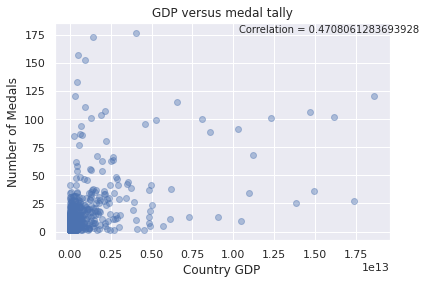

In [ ]:
year_team_gdp = olympics_final.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medal_tally_gdp = medal_tally.merge(year_team_gdp,
                                   left_on = ['Year', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')

row_mask_5 = medal_tally_gdp['Medal_Won_Corrected'] > 0
row_mask_6 = medal_tally_gdp['Team'].map(lambda x: x in top_countries)




correlation = medal_tally_gdp.loc[row_mask_5, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]



plot(medal_tally_gdp.loc[row_mask_5, 'GDP'], 
     medal_tally_gdp.loc[row_mask_5, 'Medal_Won_Corrected'] , 
     linestyle = 'none', 
     marker = 'o',
    alpha = 0.4)
xlabel('Country GDP')


ylabel('Number of Medals')
title('GDP versus medal tally')
text(np.nanpercentile(medal_tally_gdp['GDP'], 99.6), 
     max(medal_tally_gdp['Medal_Won_Corrected']) - 50,
     "Correlation = " + str(correlation))

The correlation value 0.47 indicates a moderate possitive correlation which means yes the richer countries do perform better in general

##Can we predict the medal tally of a country ?

Given what we know, Can we predict the medal tally of a country ?
we have 3 features that we know for sure they affects the performance which are GDP, Contingent size and Hosting advantage.
and we have also another feature that maybe also related which is population size so giving these 4 features we will use a reggresion model to predict the medal tally for each country. 
then we will compare the predicted values to the original values if the predicted values are close to the original this means we succedeed and that we have done something very useful here.  

In [ ]:
# create the year, team contingent size
year_team_gender = olympics_final.loc[:,['Year','Team', 'Name', 'Sex']].drop_duplicates()

year_team_gender_count = pd.pivot_table(year_team_gender,
                                        index = ['Year', 'Team'],
                                        columns = 'Sex',
                                        aggfunc = 'count').reset_index()


year_team_gender_count.columns = year_team_gender_count.columns.get_level_values(0)




year_team_gender_count.columns = ['Year', 'Team', 'Female_Athletes', 'Male_Athletes']
year_team_gender_count = year_team_gender_count.fillna(0)



# get the total athletes per team-year
year_team_gender_count['Total_Athletes'] = year_team_gender_count['Female_Athletes'] + \
year_team_gender_count['Male_Athletes']



year_team_contingent = year_team_gender_count.loc[:, ['Year', 'Team','Total_Athletes']]
year_team_contingent.head()

,Year,Team,Total_Athletes
0,1896,Australia,1.0
1,1896,Austria,3.0
2,1896,Denmark,3.0
3,1896,France,12.0
4,1896,Germany,17.0


In [ ]:
medal_tally_gdp.head()

,Year,Team,Medal_Won_Corrected,GDP
0,1896,Australia,3.0,NaN
1,1896,Austria,5.0,NaN
2,1896,Denmark,6.0,NaN
3,1896,France,11.0,NaN
4,1896,Germany,12.0,NaN


In [ ]:
year_team_pop = olympics_final.loc[:, ['Year', 'Team', 'Population']].drop_duplicates()
year_team_pop.head()

,Year,Team,Population
0,1992,China,1.164970e+09
1,2012,China,1.350695e+09
2,1920,Denmark,NaN
3,1900,Denmark,NaN
4,1988,Netherlands,1.476009e+07


In [ ]:
# merge all these datasets together
medal_gdp_population = medal_tally_gdp.merge(year_team_pop,
                                            left_on = ['Year', 'Team'],
                                            right_on = ['Year', 'Team'],
                                            how = 'left')

medal_gdp_pop_contingent = medal_gdp_population.merge(year_team_contingent,
                                                     left_on = ['Year', 'Team'],
                                                     right_on = ['Year', 'Team'],
                                                     how = 'left')
medal_gdp_pop_contingent.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes
0,1896,Australia,3.0,NaN,NaN,1.0
1,1896,Austria,5.0,NaN,NaN,3.0
2,1896,Denmark,6.0,NaN,NaN,3.0
3,1896,France,11.0,NaN,NaN,12.0
4,1896,Germany,12.0,NaN,NaN,17.0


As we see gdp and population values are only available starting from the year 1962 so we will only consider the values past this year in order to have an accurate results when using the prediction model

In [ ]:
medal_gdp_pop_contingent = medal_gdp_pop_contingent.loc[(medal_gdp_pop_contingent["Year"] >= 1962)]

In [ ]:
medal_gdp_pop_contingent.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes
629,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0
630,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0
631,1964,Argentina,1.0,2.560525e+10,21953929.0,114.0
632,1964,Australia,18.0,2.378766e+10,11167000.0,243.0
633,1964,Austria,12.0,9.169984e+09,7223801.0,136.0


In [ ]:
# get host nation from the data
year_host = olympics_final.loc[:, ['Year', 'Host_Country']].drop_duplicates()

# merge this with the larger dataset
lin_model_data = medal_gdp_pop_contingent.merge(year_host,
                              left_on = 'Year',
                              right_on = 'Year',
                              how = 'left')

lin_model_data.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes,Host_Country
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Austria
1,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Japan
2,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Austria
3,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Japan
4,1964,Argentina,1.0,2.560525e+10,21953929.0,114.0,Austria


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Population Distribution')

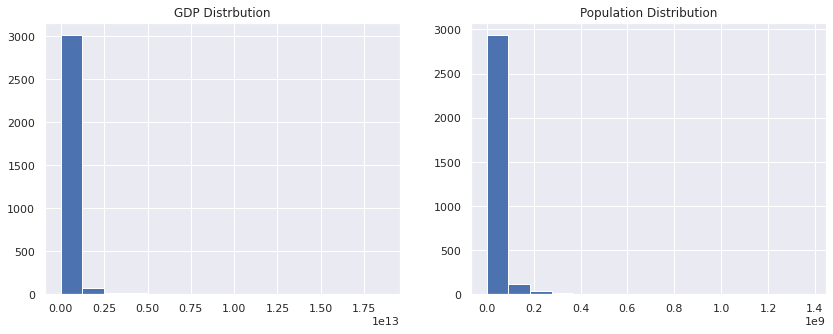

In [ ]:
# Regression model
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import metrics

# add indicator to see whether home advantage
lin_model_data['Home_adv'] = np.where(lin_model_data['Host_Country'] == lin_model_data['Team'], 1, 0)

# Add per capita GDP
lin_model_data['GDP_per_capita'] = lin_model_data['GDP']/lin_model_data['Population']

# remove NAs
lin_model_data.dropna(how = 'any', inplace = True)


# Lets see the distrbution of population and GDP in a histogram

fig, (ax1, ax2) = subplots(nrows = 1,
                          ncols = 2,
                          figsize = (14,5))

lin_model_data['GDP'].hist(bins = 15, ax = ax1)
ax1.set_title('GDP Distrbution')

lin_model_data['Population'].hist(bins = 15, ax = ax2)
ax2.set_title('Population Distribution')


The charts show that these variables are highly skewed. It is better to do a logarithmic transform of these for better fit in the linear model.

In [ ]:
import math

lin_model_data['Log_Population'] = np.log(lin_model_data['Population'])
lin_model_data['Log_GDP'] = np.log(lin_model_data['GDP'])
lin_model_data.head()

,Year,Team,Medal_Won_Corrected,GDP,Population,Total_Athletes,Host_Country,Home_adv,GDP_per_capita,Log_Population,Log_GDP
0,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Austria,0,82.208444,16.090864,20.500122
1,1964,Afghanistan,0.0,8.000000e+08,9731361.0,8.0,Japan,0,82.208444,16.090864,20.500122
2,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Austria,0,236.610190,16.324782,21.791196
3,1964,Algeria,0.0,2.909352e+09,12295970.0,1.0,Japan,0,236.610190,16.324782,21.791196
4,1964,Argentina,1.0,2.560525e+10,21953929.0,114.0,Austria,0,1166.317400,16.904457,23.966063


Text(0.5, 1.0, 'Log_Population Distribution')

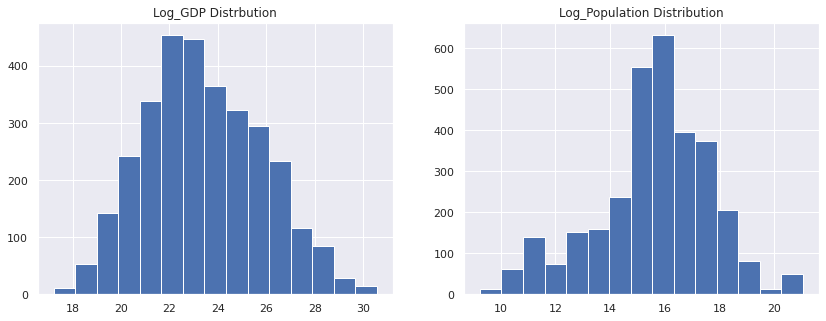

In [ ]:
fig, (ax1, ax2) = subplots(nrows = 1,
                          ncols = 2,
                          figsize = (14,5))

lin_model_data['Log_GDP'].hist(bins = 15, ax = ax1)
ax1.set_title('Log_GDP Distrbution')

lin_model_data['Log_Population'].hist(bins = 15, ax = ax2)
ax2.set_title('Log_Population Distribution')


We can see a much better distribution after the logarithmic transformation

 


In [ ]:
# regression model
y, X = dmatrices('Medal_Won_Corrected ~ Log_GDP + Log_Population + Total_Athletes + Home_adv + GDP_per_capita', 
                data = lin_model_data,
                return_type = 'dataframe')

model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Medal_Won_Corrected   R-squared:                       0.750
Model:                             OLS   Adj. R-squared:                  0.749
Method:                  Least Squares   F-statistic:                     1881.
Date:                 Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                         11:51:37   Log-Likelihood:                -10826.
No. Observations:                 3145   AIC:                         2.166e+04
Df Residuals:                     3139   BIC:                         2.170e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.9302      1.643      6.652      0.000       7.708      14.152
Log_GDP           -0.7887      0.124     -6.356      0.000      -1.032      -0.545
Log_Population     0.2733      0.128      2.135      0.033       0.022       0.524
Total_Athletes     0.1435      0.002     81.253      0.000       0.140       0.147
Home_adv          -6.9500      1.556     -4.466      0.000     -10.002      -3.898
GDP_per_capita  3.146e-05   1.18e-05      2.665      0.008    8.31e-06    5.46e-05
==============================================================================
Omnibus:                     2771.340   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           305552.218
Skew:                           3.675   Prob(JB):                         0.00
Kurtosis:                      50.725   Cond. No.                     2.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# what is the error associated with this prediction?
y_predicted = result.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_predicted))

7.562919530422162

As we can see we are able to predict the medal tally with only an error of 7 medals ! 

# Research  Questions





1. Who are the greatest olympics playing nations of all time ?
2. What sports are the top countries best at?
3. Does the size of the contingent relate with the number of medals ?
4. Do hosting the olympics is an advatage to the hosting team ?
5. Do richer countries perform better at olympics ?
6. Can we predict the medal tally of a country ?